# WENO Interpolation
[]: # (C) 2017-2024, Manuel A. Diaz

In [1]:
# Load everything from sympy
from sympy import *
init_printing(use_unicode=True)

In [2]:
# Define Fornberg's weights algorithm 
def FornbergWeights(k, xbar, x):
    # """
    # Fornberg's algorithm for computing the weights of the finite difference approximation for the derivative.
    
    # Parameters:
    # k (int): The order of the derivative.
    # x0 (float): The point at which the derivative is to be estimated.
    # x (list): The list of nodes / grid-points.
    
    # Returns:
    # list: A list containing the weights of the finite difference approximation for the derivative.
    # """
    n = len(x)
    if k >= n:
        raise ValueError("Order of derivative k must be less than length of x list.")

    m = k; # Order of the stencil, i.e. the degree of polynomial that is exactly reproduced

    c1 = 1
    c4 = x[0] - xbar
    C = [ [0] * n for _ in range(m + 1) ] # initialize a list of lists with zeros
    C[0][0] = 1
    for i in range(1, n):
        mn = min(i, m)
        c2 = 1
        c5 = c4
        c4 = x[i] - xbar
        for j in range(0, i):
            c3 = x[i] - x[j]
            c2 = c2 * c3
            if j == (i-1):
                for s in range(mn, 0, -1):
                    C[s][i] = c1 * (s*C[s-1][i-1] - c5*C[s][i-1]) / c2
                C[0][i] = -c1*c5*C[0][i-1] / c2
            for s in range(mn, 0, -1):
                C[s][j] = (c4*C[s][j] - s*C[s-1][j]) / c3
            C[0][j] = c4*C[0][j] / c3
        c1 = c2
    return C[-1]

In [3]:
# Compute interpolation weights
k = 0

In [4]:
# Right interface interpolation
xRight = 0.5

# Compute interpolation weights for the 5-point stencil
w = FornbergWeights(k, xRight, [-2,-1, 0, 1, 2]); b = Matrix(w).applyfunc(nsimplify)

# Full polynomial interpolant
u1, u2, u3, u4, u5 = Symbol('u1'), Symbol('u2'), Symbol('u3'), Symbol('u4'), Symbol('u5')
U = Matrix([u1, u2, u3, u4, u5])
p = b.T * U

# Display the polynomial interpolant
p

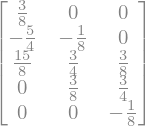

In [5]:
# Initialize an empty matrix of size 3x5
A = zeros(5,3)

# Compute 3 sub-stencils of the 5-point stencil
w1 = FornbergWeights(k, xRight, [-2,-1, 0]); coefs1 = Matrix(w1).applyfunc(nsimplify)
w2 = FornbergWeights(k, xRight, [-1, 0, 1]); coefs2 = Matrix(w2).applyfunc(nsimplify)
w3 = FornbergWeights(k, xRight, [ 0, 1, 2]); coefs3 = Matrix(w3).applyfunc(nsimplify)
A[0:3,0] = coefs1
A[1:4,1] = coefs2
A[2:5,2] = coefs3

# Display the matrix
A

In [6]:
# Compute the linear weights for the 5-point stencil using singular value decomposition
gamma = A.LUsolve(b)
gamma.T


In [7]:
# Left interface interpolation
xLeft = -0.5

# Compute interpolation weights for the 5-point stencil
w = FornbergWeights(k, xLeft, [-2,-1, 0, 1, 2]); b = Matrix(w).applyfunc(nsimplify)

# Full polynomial interpolant
u1, u2, u3, u4, u5 = Symbol('u1'), Symbol('u2'), Symbol('u3'), Symbol('u4'), Symbol('u5')
u = Matrix([u1, u2, u3, u4, u5])
p = b.T * u
p

The entire Left side is mirror symmetric to the Right side.